In [5]:
#Matplotlib for data visualization
import matplotlib.pyplot as plt
#Numpy for aggregate statistics
import numpy as np
#Datetime for organizing dates
import datetime
#Pandas for data manipulation and analysis
import pandas as pd
df = pd.read_csv(r'example_data.csv')


In [6]:
#First read the data: view all columns, all rows, and check if there is any missing or bad data

df.head(5)
#df.dtypes
#df.columns
#df.iloc[0:-1]
#df['month'].unique()

,month,variable,sex,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan
0,1976-01,Employment,Both sexes,819.5,1029.7,427.4,229.6,162.4,303.0,3707.4,42.7,2545.4,369.5
1,1976-01,Employment,Females,307.1,379.3,164.9,84.3,50.8,110.3,1426.7,16.5,879.5,131.9
2,1976-01,Employment,Males,512.5,650.4,262.6,145.3,111.6,192.7,2280.7,26.2,1665.9,237.6
3,1976-01,Full-time employment,Both sexes,693.7,877.1,369.0,201.7,150.0,265.4,3209.1,37.2,2315.6,312.2
4,1976-01,Full-time employment,Females,217.9,274.6,119.8,62.7,42.1,84.6,1084.1,12.7,727.0,93.3


In [7]:
#Then, read Alberta and Ontario only between Jan 2007 to Nov 2019

df = df[['month','variable','sex','Alberta','Ontario']]

#df.loc[df['month'] == '2007-01']
#df.iloc[3347]

df = df.iloc[3348:-1]
df

,month,variable,sex,Alberta,Ontario
3348,2007-01,Employment,Both sexes,1962.9,6499.9
3349,2007-01,Employment,Females,880.9,3107.2
3350,2007-01,Employment,Males,1082.0,3392.7
3351,2007-01,Full-time employment,Both sexes,1656.1,5292.7
3352,2007-01,Full-time employment,Females,662.7,2285.3
...,...,...,...,...,...
4737,2019-11,Full-time employment,Both sexes,1922.4,6120.2
4738,2019-11,Full-time employment,Females,788.4,2708.6
4739,2019-11,Full-time employment,Males,1134.0,3411.6
4740,2019-11,Part-time employment,Both sexes,416.3,1398.2


In [9]:
#For the purposes of this task, we are interested in the total employment for both sexes
df = df.loc[(df['variable'] == 'Employment') & (df['sex'] == 'Both sexes')]
df

,month,variable,sex,Alberta,Ontario
3348,2007-01,Employment,Both sexes,1962.9,6499.9
3357,2007-02,Employment,Both sexes,1971.9,6511.0
3366,2007-03,Employment,Both sexes,1971.9,6518.0
3375,2007-04,Employment,Both sexes,1978.5,6507.3
3384,2007-05,Employment,Both sexes,1978.2,6521.6
...,...,...,...,...,...
4698,2019-07,Employment,Both sexes,2343.7,7420.3
4707,2019-08,Employment,Both sexes,2344.3,7478.1
4716,2019-09,Employment,Both sexes,2349.2,7519.2
4725,2019-10,Employment,Both sexes,2356.9,7503.0


In [11]:
#55 rows × 5 columns

#Drop redundant columns 'variable' and 'sex' because all values equal 'Employment' and 'Both sexes' respectively

df = df.drop(columns=['variable', 'sex'])

#Reset index for simplicity

df.reset_index(drop=True, inplace=True)
df

#Dataframe now represents total employment in Alberta and Ontario, by month, from January 2007 to November 2019

,month,Alberta,Ontario
0,2007-01,1962.9,6499.9
1,2007-02,1971.9,6511.0
2,2007-03,1971.9,6518.0
3,2007-04,1978.5,6507.3
4,2007-05,1978.2,6521.6
...,...,...,...
150,2019-07,2343.7,7420.3
151,2019-08,2344.3,7478.1
152,2019-09,2349.2,7519.2
153,2019-10,2356.9,7503.0


In [12]:
#Group data by year so to calculate annual growth rate
#Column month is an object and must be changed to datetime
df.dtypes

month       object
Alberta    float64
Ontario    float64
dtype: object

In [13]:
df['month'] = pd.to_datetime(df['month'].astype(str), format='%Y%')
df

,month,Alberta,Ontario
0,2007-01-01,1962.9,6499.9
1,2007-02-01,1971.9,6511.0
2,2007-03-01,1971.9,6518.0
3,2007-04-01,1978.5,6507.3
4,2007-05-01,1978.2,6521.6
...,...,...,...
150,2019-07-01,2343.7,7420.3
151,2019-08-01,2344.3,7478.1
152,2019-09-01,2349.2,7519.2
153,2019-10-01,2356.9,7503.0


In [14]:
#Rename column month to Year, and for clarity rename Alberta to Alberta Employment and Ontario to Ontario Employment

df.columns = ['Year', 'Alberta Employment', 'Ontario Employment']

In [15]:
#Group data by year
grouped = df.groupby(df['Year'].map(lambda x: x.year), as_index=False)

#View months seperated by year of employment in Alberta and Ontario
for year,group in grouped:
    print (year)
    print (group)
    
#Check to see if data is still accurate
#grouped.size()
#grouped.describe()

2007
         Year  Alberta Employment  Ontario Employment
0  2007-01-01              1962.9              6499.9
1  2007-02-01              1971.9              6511.0
2  2007-03-01              1971.9              6518.0
3  2007-04-01              1978.5              6507.3
4  2007-05-01              1978.2              6521.6
5  2007-06-01              1989.5              6530.0
6  2007-07-01              1999.0              6558.8
7  2007-08-01              2001.6              6559.4
8  2007-09-01              2004.8              6578.1
9  2007-10-01              2004.3              6610.0
10 2007-11-01              2007.2              6586.2
11 2007-12-01              2027.6              6569.6
2008
         Year  Alberta Employment  Ontario Employment
12 2008-01-01              2030.2              6578.8
13 2008-02-01              2030.2              6626.7
14 2008-03-01              2038.2              6605.8
15 2008-04-01              2044.6              6623.0
16 2008-05-01     

In [16]:
#Determine annual growth rate year-over-year
df[['AC%','OC%']]=df.sort_values(['Year'])[['Alberta Employment','Ontario Employment']].pct_change()*100
df

,Year,Alberta Employment,Ontario Employment,AC%,OC%
0,2007-01-01,1962.9,6499.9,NaN,NaN
1,2007-02-01,1971.9,6511.0,0.458505,0.170772
2,2007-03-01,1971.9,6518.0,0.000000,0.107510
3,2007-04-01,1978.5,6507.3,0.334703,-0.164161
4,2007-05-01,1978.2,6521.6,-0.015163,0.219753
...,...,...,...,...,...
150,2019-07-01,2343.7,7420.3,-0.606446,-0.143991
151,2019-08-01,2344.3,7478.1,0.025601,0.778944
152,2019-09-01,2349.2,7519.2,0.209018,0.549605
153,2019-10-01,2356.9,7503.0,0.327771,-0.215448


In [17]:
#Double check 
((2052.9-2027.6)/2027.6)*100

1.2477806273426801

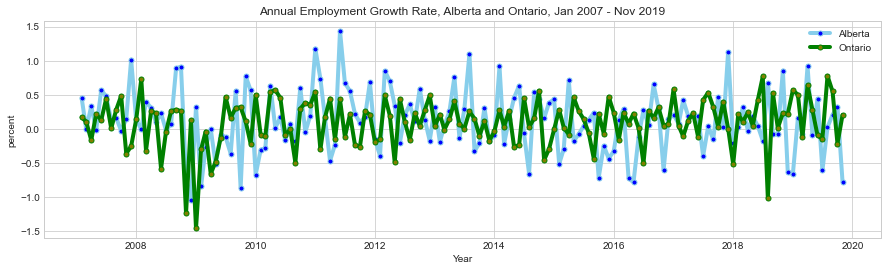

In [20]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,4))
plt.plot( 'Year', 'AC%', data=df, marker='o', markerfacecolor='blue', markersize=5, color='skyblue', linewidth=4, label="Alberta")
plt.plot( 'Year', 'OC%', data=df, marker='o', markerfacecolor='olive', markersize=5, color='green', linewidth=4, label="Ontario")
plt.legend()
plt.xlabel('Year')
plt.ylabel('percent')
plt.title('Annual Employment Growth Rate, Alberta and Ontario, Jan 2007 - Nov 2019')
plt.savefig('Annual_Employment_Growth_Rate_Alberta_Ontario_2007_2019.png')